In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
#Read CSV file
gdp_vs_happy = pd.read_csv("Data/GDP_v_satisfaction/gdp_vs_happiness.csv")
working_hrs = pd.read_csv('Data/Working_hours/annual_working_hours.csv')


In [3]:
gdp_vs_happy["Year"] = pd.to_numeric(gdp_vs_happy['Year'],errors='coerce')
# replaces all NaNs with zeros to be filtered out
gdp_vs_happy = gdp_vs_happy.replace(np.nan,0,regex=True)

In [4]:
gdp_vs_happy['Year']= gdp_vs_happy['Year'].astype(int)
working_hrs['Year']= working_hrs['Year'].astype(int)


In [5]:
combined_df = pd.merge(gdp_vs_happy, working_hrs, on=["Entity","Year"])
combined_df

,Entity,Code_x,Year,GDP per capita (constant 2011 international $),Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best)),Unnamed: 5,Code_y,Average annual hours worked by persons engaged (hours per person engaged)
0,Argentina,ARG,1950,0.000000,0.000000,17038000.0,ARG,2034.0000
1,Argentina,ARG,1951,0.000000,0.000000,17390000.0,ARG,2037.8667
2,Argentina,ARG,1952,0.000000,0.000000,17743000.0,ARG,2041.7408
3,Argentina,ARG,1953,0.000000,0.000000,18094000.0,ARG,2045.6223
4,Argentina,ARG,1954,0.000000,0.000000,18443000.0,ARG,2049.5112
...,...,...,...,...,...,...,...,...
3368,Vietnam,VNM,2013,5024.438902,5.022699,90753000.0,VNM,2267.4883
3369,Vietnam,VNM,2014,5264.828100,5.084923,91714000.0,VNM,2150.6357
3370,Vietnam,VNM,2015,5554.858056,5.076315,92677000.0,VNM,2169.5916
3371,Vietnam,VNM,2016,5837.628704,5.062267,93640000.0,VNM,2169.5916


In [7]:
#Rename colums to make shorter
gdp_df = combined_df.rename(columns={'Entity': 'Country','GDP per capita (constant 2011 international $)': 'GDP Per Capita',' Life satisfaction (country average; 0-10) (Cantril Ladder (0=worst; 10=best))': 'Life Satisfaction 0-10', 'Year_x': 'Year', 'Average annual hours worked by persons engaged (hours per person engaged)' : 'Hours Worked', 'Unnamed: 5': 'Population'})
del gdp_df['Code_y']
del gdp_df['Code_x']
#del combined_df['GDP Per Capita']
gdp_df

,Country,Year,GDP Per Capita,Life Satisfaction 0-10,Population,Hours Worked
0,Argentina,1950,0.000000,0.000000,17038000.0,2034.0000
1,Argentina,1951,0.000000,0.000000,17390000.0,2037.8667
2,Argentina,1952,0.000000,0.000000,17743000.0,2041.7408
3,Argentina,1953,0.000000,0.000000,18094000.0,2045.6223
4,Argentina,1954,0.000000,0.000000,18443000.0,2049.5112
...,...,...,...,...,...,...
3368,Vietnam,2013,5024.438902,5.022699,90753000.0,2267.4883
3369,Vietnam,2014,5264.828100,5.084923,91714000.0,2150.6357
3370,Vietnam,2015,5554.858056,5.076315,92677000.0,2169.5916
3371,Vietnam,2016,5837.628704,5.062267,93640000.0,2169.5916


In [8]:
#Country list to Analyze
country_list = ["United States", "Mexico", "Venezuela", "Brazil", "South Africa", "Nigeria", "Poland", "Sweden", "Russia", "China", "South Korea", "Australia"]
gdp_df = gdp_df[gdp_df.Country.isin(country_list)]
gdp_df.head(100)

,Country,Year,GDP Per Capita,Life Satisfaction 0-10,Population,Hours Worked
68,Australia,1950,0.0,0.0,8177000.0,2178.2456
69,Australia,1951,0.0,0.0,8398000.0,2158.1013
70,Australia,1952,0.0,0.0,8595000.0,2138.1436
71,Australia,1953,0.0,0.0,8782000.0,2118.3701
72,Australia,1954,0.0,0.0,8970000.0,2098.7798
...,...,...,...,...,...,...
358,Brazil,1977,0.0,0.0,112425000.0,2031.8329
359,Brazil,1978,0.0,0.0,115121000.0,2016.1005
360,Brazil,1979,0.0,0.0,117878000.0,2000.4897
361,Brazil,1980,0.0,0.0,120694000.0,1985.0000


In [ ]:
#Get data after 1950
gdp_df = gdp_df[gdp_df['Year'].values >= '1990']


gdp_df.fillna(0, inplace = True)
gdp_df

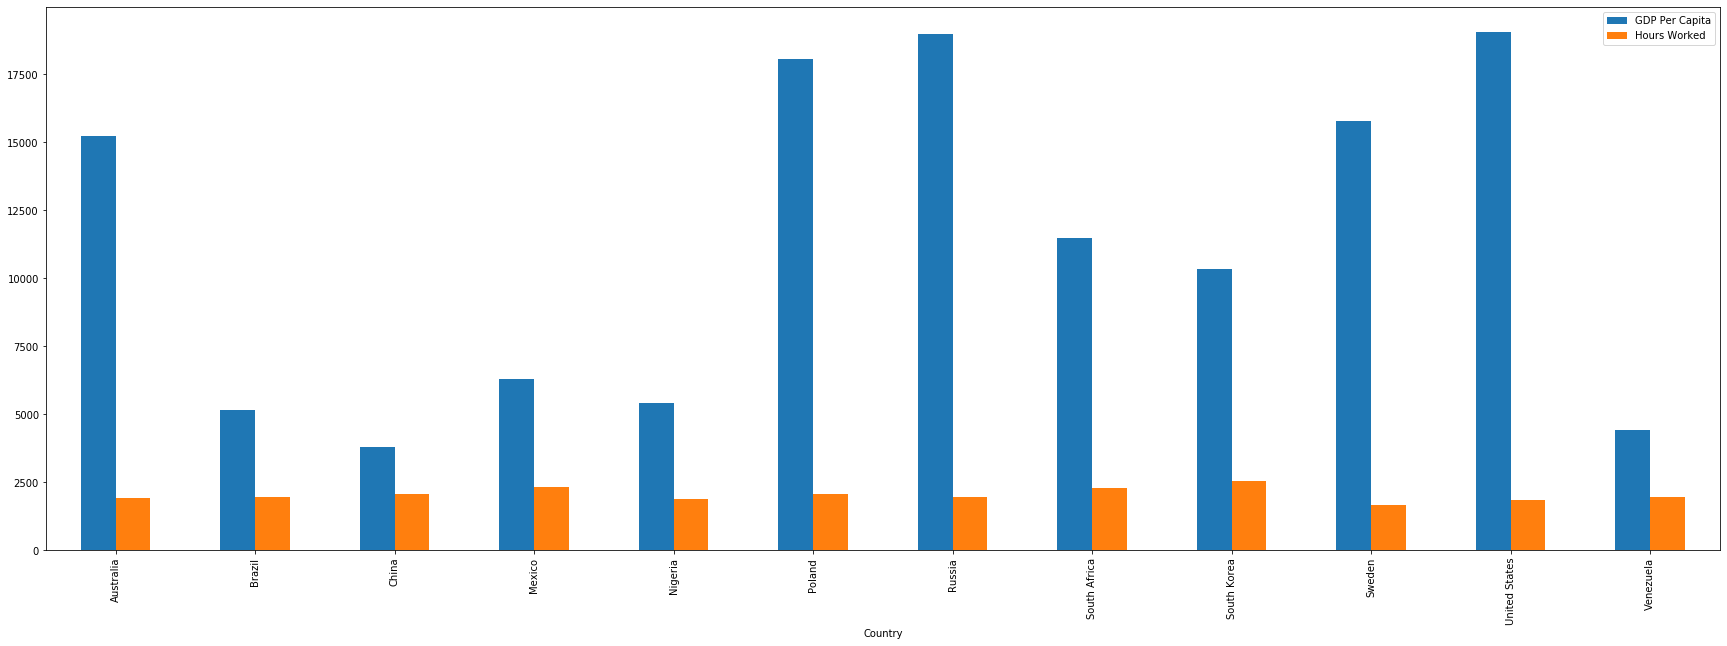

In [9]:
gdp_df.groupby('Country')[['GDP Per Capita','Hours Worked']].mean().plot(kind='bar', figsize=(30,10))
#gdp_df.groupby('Country')['Population'].mean().plot(kind='line', figsize=(30,10))
plt.show()



In [40]:
gdp_df.dtypes

Country                    object
Year                        int64
GDP Per Capita            float64
Life Satisfaction 0-10    float64
Population                float64
Hours Worked              float64
dtype: object

In [60]:
hrs_worked_USA = gdp_df.loc[gdp_df['Country']=='United States']
hrs_worked_MEX = gdp_df.loc[gdp_df['Country']==['Mexico']
                            
#hrs_worked_USA.plot(kind='line',x='Year',y='Hours Worked',figsize=(30,10))
                            
#plt.plot(hrs_worked_USA.Year, hrs_worked_USA["Hours Worked"], color="blue", label="United States")                            
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)


#gdp_df.groupby('Country')['Population'].mean().plot(kind='line', figsize=(30,10))



SyntaxError: unexpected EOF while parsing (<ipython-input-60-2a9aa836fe2a>, line 11)

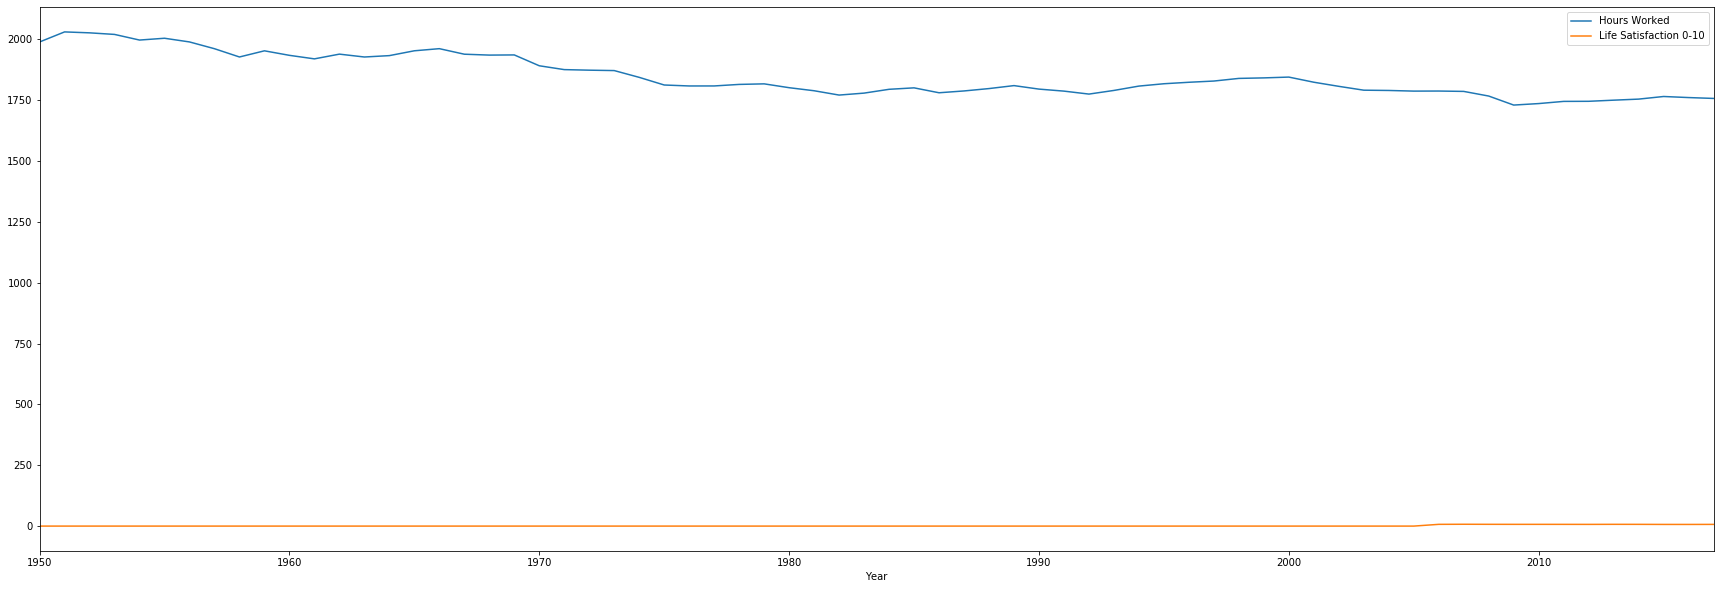

In [57]:
gdp_swe = gdp_df.loc[gdp_df['Country']=='United States']
#gdp_swe = gdp_swe.loc[gdp_df['Year']=='2016']
#del gdp_swe['Hours Worked']
gdp_swe.groupby('Year')[['Hours Worked', 'Life Satisfaction 0-10']].mean().plot(kind='line', figsize=(30,10))

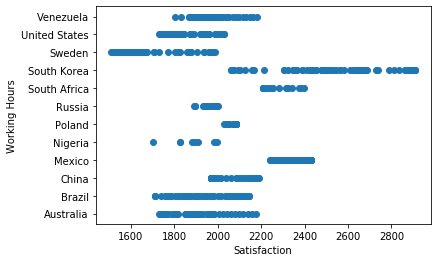

In [22]:
alcohol = gdp_df['Hours Worked']
color_intensity = gdp_df['Country']
plt.scatter(alcohol,color_intensity)
plt.xlabel("Satisfaction")
plt.ylabel("Working Hours")
#plt.xticks(rotation=90)
plt.show()

In [21]:
import seaborn as sns
sns.scatterplot(data=gdp_df, x='Work hours per persons engaged', y='Cantril Ladder(0=worst,10=best)', hue='Code',legend='full')

plt.title("Working hours vs Cantril Ladder Happiness")
plt.legend(loc="center left", bbox_to_anchor=(1,.5))
plt.show()

ValueError: Could not interpret input 'Work hours per persons engaged'

In [ ]:
gdp_swe['Year']= gdp_swe['Year'].astype(int)
gdp_swe.dtypes


In [ ]:
#gdp_swe.plot(figsize=(25,5));
#gdp_swe.plot(kind='bar',x='Year',y='Hours Worked',color='red', figsize=(25,5))

ax = plt.gca()

#gdp_swe.plot(kind='line',x='Year',y='Hours Worked',ax=ax)
gdp_swe.plot(kind='line',x='Year',y='Life Satisfaction 0-10', color='red', ax=ax, figsize=(30,10))

plt.show()

In [ ]:
gdp_swe.groupby('Year').mean()


In [ ]:
#years = gdp_swe['Year']
#gdp_swe.plot(figsize=(35,20));
#plt.figure(figsize=(40,10))
#plt.bar(years, gdp_swe['Life Satisfaction 0-10'])
#plt.plot(years, gdp_swe['GDP Per Capita'])
#plt.xticks(rotation=90)
#plt.ylabel('Happiness Levels')


#plt.tight_layout()
#plt.show()

#plt.scatter(gdp_swe.iloc[:,1],gdp_swe.iloc[:,3])

#gdp_swe.plot(x='Year', y='Hours Worked')

ax = plt.gca()

#gdp_swe.plot(kind='line',x='Year',y='Hours Worked',ax=ax, figsize=(30,10))
gdp_swe.plot(kind='line',x='Year',y='Life Satisfaction 0-10', color='red', ax=ax, figsize=(30,10))

plt.show()

In [ ]:
#combined_df = pd.merge(gdp_vs_happy, working_hrs, on="Entity")
#combined_df

#Country list to Analyze
country_list = ["United States", "Mexico", "Venezuela", "Brazil", "South Africa", "Nigeria", "Poland", "Sweden", "Russia", "China", "South Korea", "Australia"]
countries = gdp_df[gdp_df.Country.isin(country_list)]
countries.head(100)

In [ ]:
combined_df

In [ ]:
mex_df = combined_df.loc[combined_df['Country'] == 'Mexico']
#mex_df = mex_df.loc[combined_df['Year'] == '2015']
mex_df= mex_df.set_index('Year')
mex_df

In [ ]:
combined_df.reset_index
combined_df

In [ ]:
combined_df.plot.bar()

In [ ]:
mex_df.


In [ ]:
years = combined_df.Year.unique()
years = pd.to_numeric(years)
Mex_hrs = combined_df.loc[combined_df['Country'] == 'Mexico']['Hours Worked']
years

In [ ]:
combined_df['Year'].plot.line

In [ ]:
#Country list to Analyze
#country_list = ["United States", "Mexico", "Venezuela", "Brazil", "South Africa", "Nigeria", "Poland", "Sweden", "Russia", "China", "South Korea", "Australia"]
#countries = gdp_df[gdp_df.Country.isin(country_list)]
#countries.head(100)